# Artificial Neural Networks and Deep Learning

---

## Homework 1: Minimal Working Example

To make your first submission, follow these steps:
1. Create a folder named `[2024-2025] AN2DL/Homework 1` in your Google Drive.
2. Upload the `training_set.npz` file to this folder.
3. Upload the Jupyter notebook `Homework 1 - Minimal Working Example.ipynb`.
4. Load and process the data.
5. Implement and train your model.
6. Submit the generated `.zip` file to Codabench.


## 🌐 Connect Colab to Google Drive

In [ ]:
pip install keras==3.4.1 tensorflow==2.17.0 keras_cv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 96.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.3/381.3 kB 24.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow
   

In [ ]:
from google.colab import drive

drive.mount('/gdrive')
%cd /gdrive/My Drive/[2024-2025] AN2DL/Homework 1

Mounted at /gdrive
/gdrive/My Drive/[2024-2025] AN2DL/Homework 1


## ⚙️ Import Libraries

In [ ]:
import numpy as np

import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl

np.random.seed(42)
tf.random.set_seed(42);

## ⏳ Load the Data

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Carica il dataset
data = np.load('/gdrive/MyDrive/[2024-2025] AN2DL/Homework 1/training_set.npz')
X_train = data['images']
y_train = data['labels']


# Carica il dataset
data2 = np.load('/gdrive/MyDrive/[2024-2025] AN2DL/Homework 1/test_set.npz')
X_test2 = data['images']
y_test2 = data['labels']


# Converti y in one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes=8)
y_test2 = tf.keras.utils.to_categorical(y_test2, num_classes=8)


In [ ]:
import hashlib

def image_hash(image):
    image_bytes = image.tobytes()
    return hashlib.sha256(image_bytes).hexdigest()

unique_images = []
unique_labels = []
duplicate_positions = set()

seen_hashes = {}

for i in range(len(X_train)):
    img_hash = image_hash(X_train[i])
    if img_hash not in seen_hashes:
        if i not in duplicate_positions:
            unique_images.append(X_train[i])
            unique_labels.append(y_train[i])
        seen_hashes[img_hash] = i
    else:
        duplicate_positions.add(seen_hashes[img_hash])
        duplicate_positions.add(i)

X_train = [X_train[i] for i in range(len(X_train)) if i not in duplicate_positions]
y_train = [y_train[i] for i in range(len(y_train)) if i not in duplicate_positions]

X_train = np.array(X_train)
y_train = np.array(y_train)


In [ ]:
# split train in training and test set
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


## 🛠️ Train and Save the Model

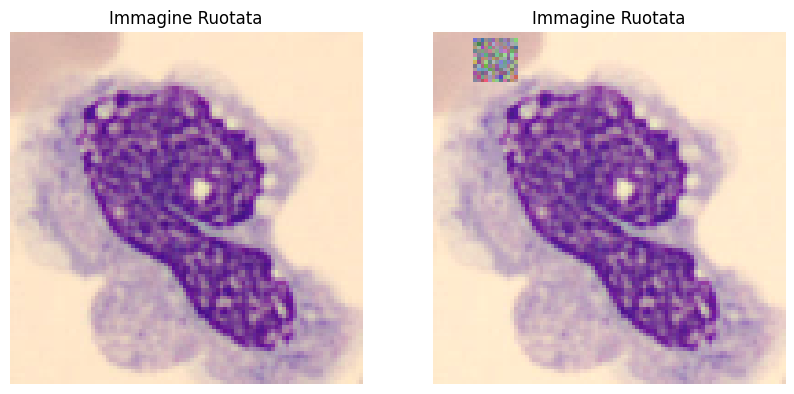

In [ ]:
import matplotlib.pyplot as plt
import keras_cv

data_augmentation= keras_cv.layers.RandomAugmentationPipeline(
    layers=[
        keras_cv.layers.RandomRotation(1),
        keras_cv.layers.RandomZoom(0.5),
        #keras_cv.layers.RandomFlip(),
        keras_cv.layers.RandomBrightness((-0.1, 0.1)),
        #keras_cv.layers.JitteredResize(
        #    target_size=(96, 96),  # Use parentheses to define a tuple
        #    scale_factor=(0.8, 1.25)
        #),
        #keras_cv.layers.RandomSharpness((0.0, 1.0), [0, 255]),
        #tfkl.RandomContrast(0.4),
        #keras_cv.layers.RandomTranslation(0.3, 0.3),
        #tfkl.GaussianNoise(stddev=0.2),
        keras_cv.layers.RandomCutout(
            (0, 0.2), (0, 0.2), fill_mode="gaussian_noise", fill_value=0.0
        )
    ],
    augmentations_per_image=2
)

# Applica la rotazione casuale
rotated_image = data_augmentation(X_train[6001])


# Visualizza l'immagine originale e quella ruotata
plt.figure(figsize=(10, 5))

# Mostra l'immagine ruotata
plt.subplot(1, 2, 1)
plt.imshow(X_train[6001])
plt.title("Immagine Ruotata")
plt.axis('off')


# Mostra l'immagine ruotata
plt.subplot(1, 2, 2)
plt.imshow(rotated_image / 255.0)
plt.title("Immagine Ruotata")
plt.axis('off')

plt.show()

In [ ]:
import numpy as np
import tensorflow as tf
import keras_cv
from tensorflow import keras as tfk
from tensorflow.keras import layers, models, applications
from tensorflow.keras.callbacks import LambdaCallback
import random
import keras
from keras.saving import register_keras_serializable

'''
@keras.saving.register_keras_serializable()
class RandomAugmentationLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(RandomAugmentationLayer, self).__init__(**kwargs)
        self.layers = [
          keras_cv.layers.RandomRotation(1),
          keras_cv.layers.RandomZoom(0.5),
          keras_cv.layers.RandomFlip(),
          keras_cv.layers.RandomBrightness(0.15),
          keras_cv.layers.RandomSharpness((0.0, 1.0), [0, 255]),
          #tfkl.RandomContrast(0.4),
          keras_cv.layers.RandomTranslation(0.3, 0.3),
          #tfkl.GaussianNoise(stddev=0.2),
          keras_cv.layers.RandomCutout(
              (0, 0.4), (0, 0.4), fill_mode="gaussian_noise", fill_value=0.0
          )
        ]

    def call(self, inputs, training=True):
        if training:
            n = random.randint(2, len(self.layers))

            # choose n randomic layers
            layers_to_apply = random.sample(self.layers, n)

            for layer in layers_to_apply:
                inputs = layer(inputs)

        return inputs'''

class MyModel:
    def __init__(self):
        """
        Inizializza lo stato interno del modello EfficientNetB0 preaddestrato.
        """
        self.neural_network = self.create_model()

    def create_model(self):
        """
        Crea e restituisce un modello più semplice con MobileNetV2.
        """

        # Definisci i layer di data augmentation
        data_augmentation = keras_cv.layers.RandomAugmentationPipeline(
            layers=[
                keras_cv.layers.RandomRotation(1),
                keras_cv.layers.RandomZoom(-0.5, 0.5),
                keras_cv.layers.RandomFlip(),
                keras_cv.layers.RandomBrightness(0.15),
                keras_cv.layers.RandomSharpness((0.0, 1.0), [0, 255]),
                #tfkl.RandomContrast(0.4),
                keras_cv.layers.RandomTranslation(0.3, 0.3),
                #tfkl.GaussianNoise(stddev=0.2),
                keras_cv.layers.RandomCutout(
                    (0, 0.4), (0, 0.4), fill_mode="gaussian_noise", fill_value=0.0
                )
            ],
            augmentations_per_image=4
        )

        # Utilizza una rete più semplice
        model_pretrained = tfk.applications.EfficientNetB0(
            input_shape=(96, 96, 3),
            include_top=False,
            weights='imagenet',
            pooling='avg'  # Pooling globale per ridurre la dimensionalità
        )

        # Costruisci il modello semplificato
        inputs = tfk.Input(shape=(96, 96, 3), name='input_layer')
        x = data_augmentation(inputs)
        x = model_pretrained(x)
        x = tfkl.Dense(128, activation='relu')(x)
        x = tfkl.Dropout(0.25)(x)
        outputs = tfkl.Dense(8, activation='softmax', name='output_layer')(x)

        model = tfk.Model(inputs=inputs, outputs=outputs, name='model')


        # Set all MobileNetV3Small layers as non-trainable
        for layer in model.get_layer('efficientnetb0').layers:
            layer.trainable = False

        # Enable training only for Conv2D and DepthwiseConv2D layers
        for i, layer in enumerate(model.get_layer('efficientnetb0').layers):
            if isinstance(layer, tf.keras.layers.Conv2D) or isinstance(layer, tf.keras.layers.DepthwiseConv2D):
                layer.trainable = True

        model.compile(
            loss=tfk.losses.CategoricalCrossentropy(),
            optimizer=tfk.optimizers.Adam(learning_rate=0.0001),
            metrics=['accuracy']
        )

        return model


    def train(self, X_train, y_train, X_test, y_test, epochs=10, batch_size=32):
        """
        Addestra il modello sui dati di input X_train e le etichette y_train.
        """

        # Allena il modello
        tl_history = self.neural_network.fit(
            x=X_train,
            y=y_train,
            batch_size=batch_size,
            epochs=epochs,
            shuffle=True,
            validation_data=(X_test, y_test),
            callbacks=[tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10, restore_best_weights=True)]
        ).history

        # Calcola e stampa la miglior accuratezza di validazione raggiunta
        final_val_accuracy = round(max(tl_history['val_accuracy']) * 100, 2)
        print(f'Final validation accuracy: {final_val_accuracy}%')

        # Salva il modello addestrato in un file, includendo l'accuratezza finale nel nome del file
        model_filename = 'weights.keras'
        self.neural_network.save(model_filename)

    def test(self, X_test, y_test):
        """
        Valuta il modello sui dati di test X_test e le etichette y_test.
        """
        test_loss, test_acc = self.neural_network.evaluate(X_test, y_test)
        print(f'Test accuracy: {test_acc}')

    def save(self):
        """
        Salva il modello in un file con il nome specificato senza il layer di data augmentation.
        """

        # remove the data augmentation layer

        self.neural_network.save('/gdrive/MyDrive/[2024-2025] AN2DL/Homework 1/weights.keras')


    def predict(self, X):
        """
        Predice le etichette corrispondenti all'input X.
        X è un array NumPy di forma (n_samples, 96, 96, 3).
        L'output è un array NumPy di forma (n_samples,).
        """
        preds = self.neural_network.predict(X)
        preds = np.argmax(preds, axis=1)
        return preds


In [ ]:
model = MyModel()

16705208/16705208 [==============================] - 0s 0us/step


In [ ]:
model.train(X_train, y_train, X_test, y_test, epochs=500, batch_size=512)

Epoch 1/500
17/17 [==============================] - 104s 5s/step - loss: 1.6432 - accuracy: 0.3908 - val_loss: 0.9732 - val_accuracy: 0.6673
Epoch 2/500
17/17 [==============================] - 78s 5s/step - loss: 0.7977 - accuracy: 0.7189 - val_loss: 0.4617 - val_accuracy: 0.8378
Epoch 3/500
17/17 [==============================] - 79s 5s/step - loss: 0.4593 - accuracy: 0.8428 - val_loss: 0.3077 - val_accuracy: 0.8948
Epoch 4/500
17/17 [==============================] - 79s 5s/step - loss: 0.3565 - accuracy: 0.8793 - val_loss: 0.2621 - val_accuracy: 0.9099
Epoch 5/500
17/17 [==============================] - 79s 5s/step - loss: 0.2831 - accuracy: 0.9037 - val_loss: 0.2162 - val_accuracy: 0.9244
Epoch 6/500
17/17 [==============================] - 79s 5s/step - loss: 0.2473 - accuracy: 0.9160 - val_loss: 0.1912 - val_accuracy: 0.9352
Epoch 7/500
17/17 [==============================] - 79s 5s/step - loss: 0.2322 - accuracy: 0.9199 - val_loss: 0.1878 - val_accuracy: 0.9358
Epoch 8/500


In [ ]:
model.test(X_test2, y_test2)

430/430 [==============================] - 39s 91ms/step - loss: 0.7501 - accuracy: 0.8699
Test accuracy: 0.8699033260345459


In [ ]:
preds = model.predict(X_test)

False
111/112 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/stepFalse
112/112 ━━━━━━━━━━━━━━━━━━━━ 19s 96ms/step


In [ ]:
model.save()

Corrette: 3477
Totali: 4128
Accuratezza: 0.842296511627907
